In [1]:
import pandas as pd 
df = pd.read_csv("drug.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,45,M,HIGH,HIGH,15.678,drugY
1,62,F,LOW,NORMAL,20.143,drugC
2,37,M,NORMAL,HIGH,9.452,drugX
3,53,F,HIGH,HIGH,18.365,drugA
4,28,M,LOW,NORMAL,11.789,drugC


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,45,M,HIGH,HIGH,15.678,drugY
1,62,F,LOW,NORMAL,20.143,drugC
2,37,M,NORMAL,HIGH,9.452,drugX
3,53,F,HIGH,HIGH,18.365,drugA
4,28,M,LOW,NORMAL,11.789,drugC
...,...,...,...,...,...,...
231,59,F,NORMAL,HIGH,16.789,drugX
232,74,M,HIGH,HIGH,24.543,drugY
233,37,F,LOW,NORMAL,10.765,drugC
234,64,M,NORMAL,HIGH,15.987,drugY


In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [17]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
131,60,F,NORMAL,HIGH,17.123,drugY
133,26,F,LOW,HIGH,10.789,drugC
168,37,M,NORMAL,HIGH,9.452,drugX
169,53,F,HIGH,HIGH,18.365,drugA
170,28,M,LOW,NORMAL,11.789,drugC
...,...,...,...,...,...,...
231,59,F,NORMAL,HIGH,16.789,drugX
232,74,M,HIGH,HIGH,24.543,drugY
233,37,F,LOW,NORMAL,10.765,drugC
234,64,M,NORMAL,HIGH,15.987,drugY


In [19]:
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
163    False
164    False
165    False
166    False
167    False
Length: 166, dtype: bool

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 167
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          166 non-null    int64  
 1   Sex          166 non-null    object 
 2   BP           166 non-null    object 
 3   Cholesterol  166 non-null    object 
 4   Na_to_K      166 non-null    float64
 5   Drug         166 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.1+ KB


Sex
M    84
F    82
Name: count, dtype: int64


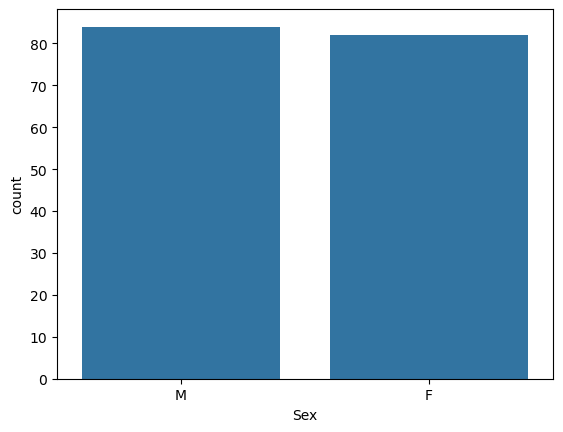

In [25]:
x = df.Sex.value_counts()
print(x)
p = sns.countplot(data=df, x='Sex')
plt.show()

Drug
drugY    85
drugC    54
drugX    18
drugA     9
Name: count, dtype: int64


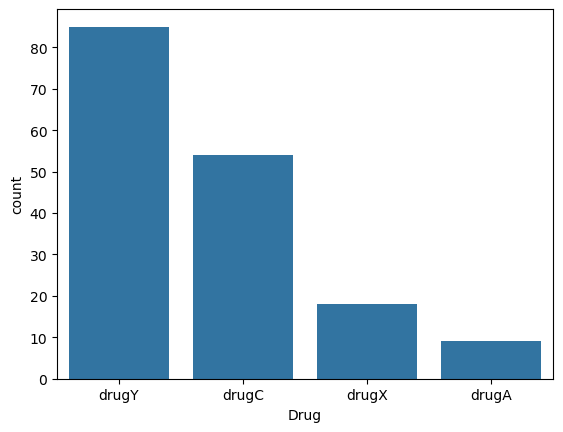

In [27]:
x = df.Drug.value_counts()
print(x)
p = sns.countplot(data=df, x='Drug')
plt.show()

In [29]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA'], dtype=object)

/var/folders/kx/3gcjr8bd1p9dh6hqpmgrpxv80000gn/T/ipykernel_5123/466824804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug'] == 'drugY']['Age'], color='green',)
/var/folders/kx/3gcjr8bd1p9dh6hqpmgrpxv80000gn/T/ipykernel_5123/466824804.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

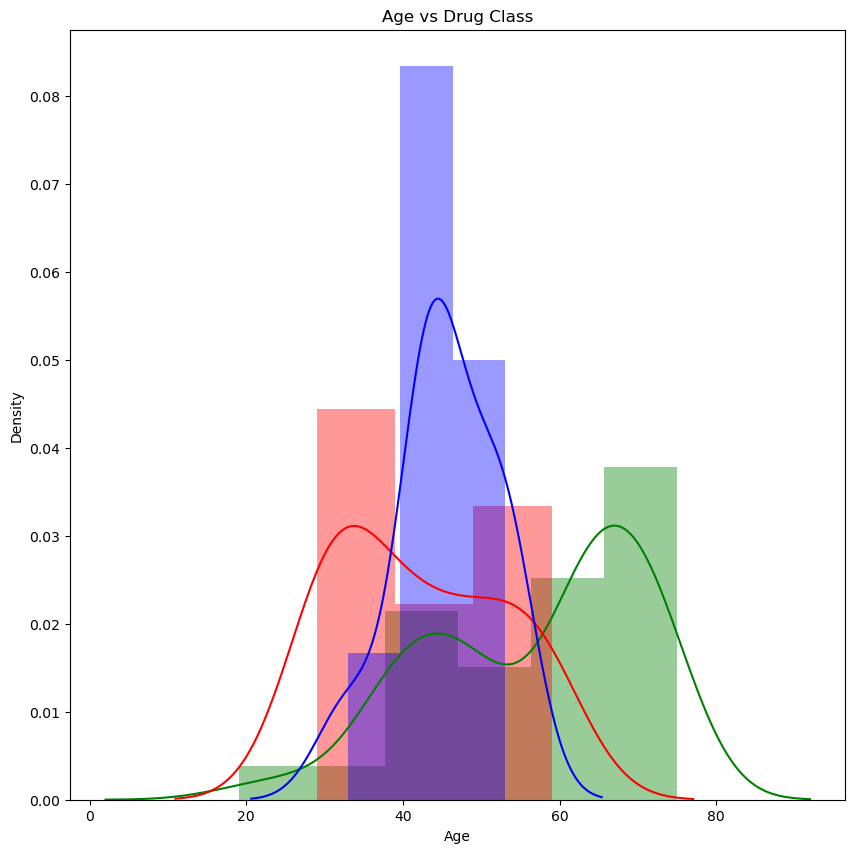

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['Drug'] == 'drugY']['Age'], color='green',)
sns.distplot(df[df['Drug'] == 'drugX']['Age'], color='red',)
sns.distplot(df[df['Drug'] == 'drugA']['Age'], color='blue',)
sns.distplot(df[df['Drug'] == 'drugB']['Age'], color='yellow',)
plt.title("Age vs Drug Class")
plt.show()

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df.loc[:, 'BP'] = oe.fit_transform(df[['BP']])
df.loc[:, 'Sex'] = oe.fit_transform(df[['Sex']])
df.loc[:, 'Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df.loc[:, 'Drug'] = oe.fit_transform(df[['Drug']])

In [39]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,45,1.0,0.0,0.0,15.678,3.0
1,62,0.0,1.0,1.0,20.143,1.0
2,37,1.0,2.0,0.0,9.452,2.0
3,53,0.0,0.0,0.0,18.365,0.0
4,28,1.0,1.0,1.0,11.789,1.0


In [41]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [43]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,45,1.0,0.0,0.0,15.678
1,62,0.0,1.0,1.0,20.143
2,37,1.0,2.0,0.0,9.452
3,53,0.0,0.0,0.0,18.365
4,28,1.0,1.0,1.0,11.789
...,...,...,...,...,...
163,55,0.0,1.0,0.0,9.789
164,32,1.0,2.0,0.0,15.234
165,72,0.0,0.0,0.0,24.567
166,63,1.0,0.0,0.0,15.678


In [45]:
y

0      3.0
1      1.0
2      2.0
3      0.0
4      1.0
      ... 
163    1.0
164    2.0
165    3.0
166    3.0
167    1.0
Name: Drug, Length: 166, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [51]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
159,48,0.0,0.0,1.0,20.567
2,37,1.0,2.0,0.0,9.452
118,30,1.0,1.0,0.0,12.234
112,48,1.0,1.0,1.0,11.456
68,64,1.0,2.0,0.0,15.987
...,...,...,...,...,...
71,67,0.0,2.0,0.0,17.890
106,27,1.0,1.0,0.0,11.678
14,47,1.0,2.0,1.0,15.432
92,29,1.0,2.0,0.0,14.567


In [53]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
100,34,1.0,1.0,0.0,12.321
138,43,1.0,0.0,0.0,23.456
78,38,1.0,0.0,1.0,21.987
56,58,1.0,2.0,0.0,16.098
97,26,0.0,1.0,0.0,10.789
29,61,0.0,2.0,0.0,17.890
104,75,1.0,2.0,0.0,14.890
82,30,1.0,1.0,0.0,12.098
164,32,1.0,2.0,0.0,15.234
108,41,1.0,0.0,1.0,21.789


In [55]:
y_test

100    1.0
138    0.0
78     3.0
56     3.0
97     1.0
29     3.0
104    3.0
82     1.0
164    2.0
108    3.0
19     1.0
42     3.0
15     3.0
67     1.0
24     3.0
31     1.0
132    3.0
51     3.0
101    3.0
16     1.0
76     1.0
18     3.0
12     0.0
9      3.0
134    3.0
75     3.0
137    3.0
60     0.0
55     1.0
148    1.0
30     0.0
142    1.0
119    3.0
85     1.0
Name: Drug, dtype: float64

In [57]:
y_train

159    3.0
2      2.0
118    1.0
112    1.0
68     3.0
      ... 
71     3.0
106    1.0
14     2.0
92     2.0
102    0.0
Name: Drug, Length: 132, dtype: float64

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

In [63]:
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [65]:
y_pred_gini

array([1., 0., 3., 2., 1., 3., 3., 1., 2., 3., 1., 3., 2., 1., 3., 1., 3.,
       2., 3., 1., 1., 3., 2., 2., 3., 3., 3., 0., 1., 1., 0., 1., 3., 1.])

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini, y_test))

0.8529411764705882


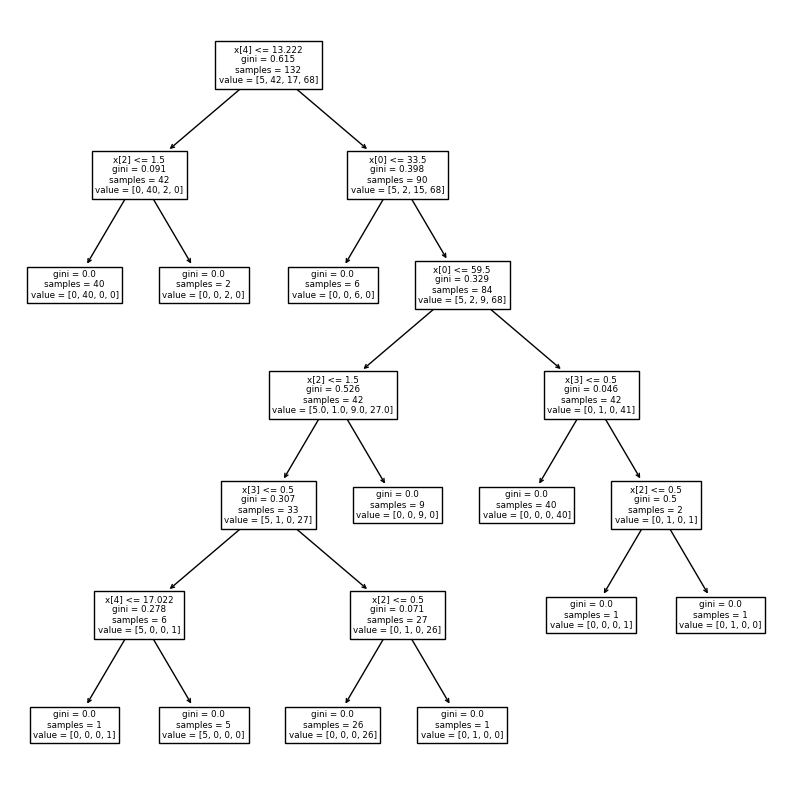

In [71]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

In [73]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print(accuracy_score(y_pred_entropy, y_test))

0.8529411764705882


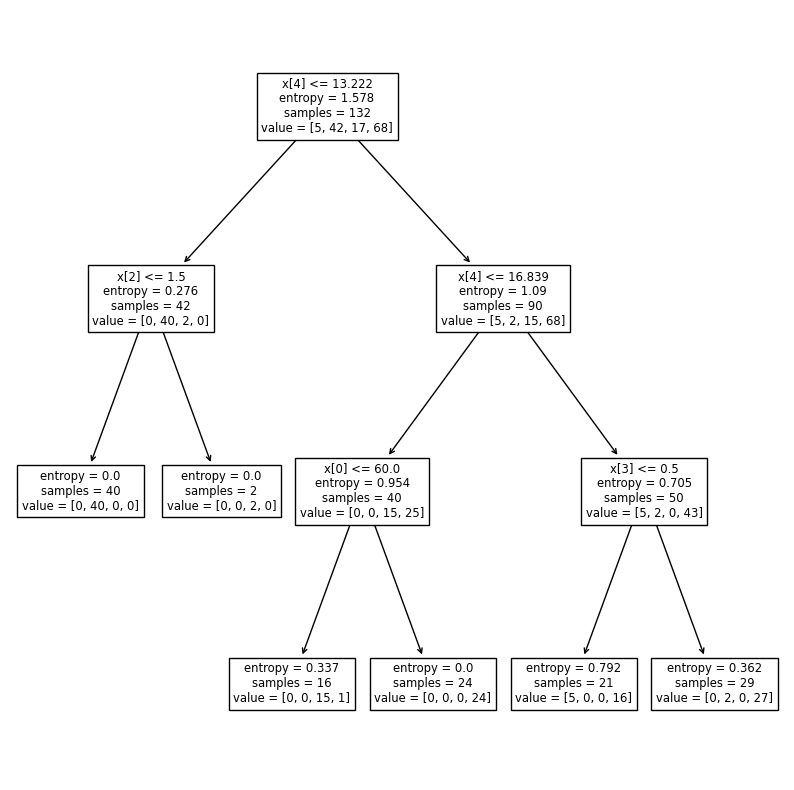

In [75]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(X_train, y_train))
plt.show()